# Classification with Neural Networks

<img src='fashion.jpg' width=800>

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from tensorflow import keras
from tensorflow.keras import layers

import cv2
import os
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Conv2D, Dense, Flatten, Input, MaxPooling2D, Dropout, BatchNormalization, Reshape

In [17]:
# Veri setlerini yükle
train_data = pd.read_csv('fashion-mnist_train.csv')
test_data = pd.read_csv('fashion-mnist_test.csv')

In [29]:
# Verileri ayır
x_train = train_data.drop('label', axis=1).values
y_train = train_data['label'].values
x_test = test_data.drop('label', axis=1).values
y_test = test_data['label'].values

In [47]:
# Verileri normalize et
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [51]:
# Verileri yeniden şekillendir
x_train = x_train.reshape(-1, 28, 28)  # (num_samples, 28, 28)
x_test = x_test.reshape(-1, 28, 28)    # (num_samples, 28, 28)

In [53]:
model = keras.Sequential([
    layers.Flatten(input_shape=(28, 28)),  # Giriş katmanı
    layers.Dense(128, activation='relu'),   # Gizli katman
    layers.Dense(10, activation='softmax')   # Çıkış katmanı
])

In [55]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [57]:
model.fit(x_train, y_train, epochs=5, batch_size=32, validation_split=0.2)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.5252 - loss: 1.6187 - val_accuracy: 0.7287 - val_loss: 0.7904
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7431 - loss: 0.7323 - val_accuracy: 0.7685 - val_loss: 0.6427
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7797 - loss: 0.6120 - val_accuracy: 0.7934 - val_loss: 0.5857
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7967 - loss: 0.5620 - val_accuracy: 0.8047 - val_loss: 0.5489
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8126 - loss: 0.5293 - val_accuracy: 0.8173 - val_loss: 0.5235


In [59]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'\nTest doğruluğu: {test_acc:.4f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8176 - loss: 0.5183   

Test doğruluğu: 0.8183


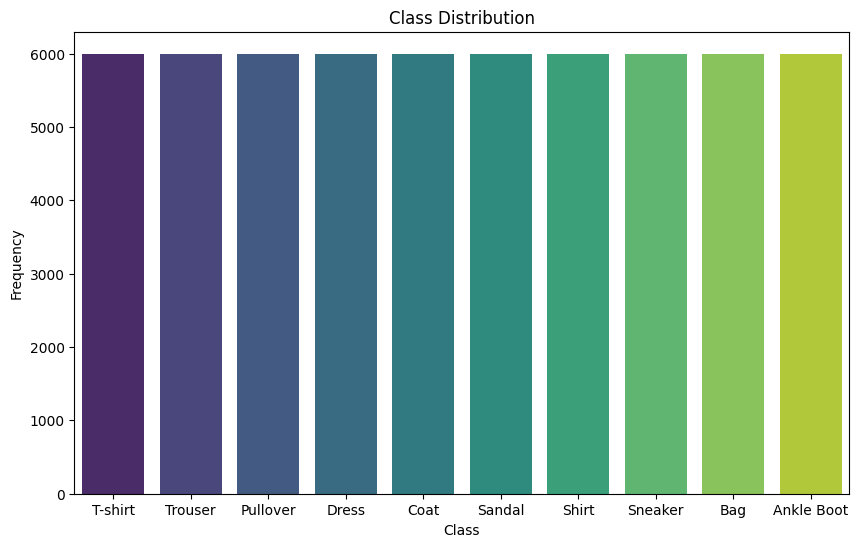

In [73]:
plt.figure(figsize=(10, 6))
sns.countplot(x='label', data=train_data, palette='viridis')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.xticks(ticks=range(10), labels=[
    'T-shirt', 'Trouser', 'Pullover', 'Dress', 
    'Coat', 'Sandal', 'Shirt', 
    'Sneaker', 'Bag', 'Ankle Boot'
])

plt.savefig('class_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

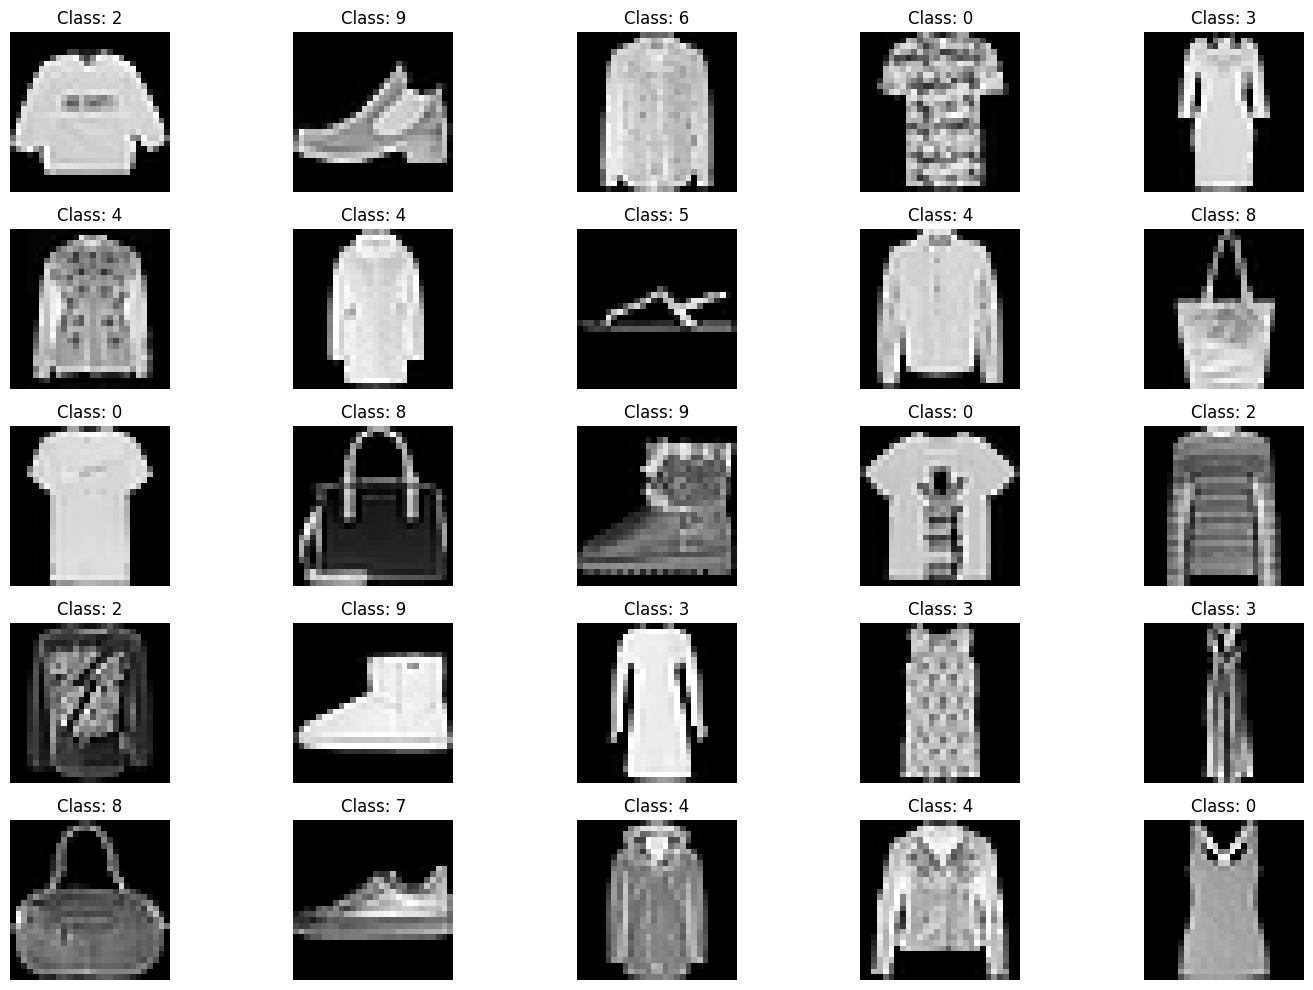

In [71]:
plt.figure(figsize=(15, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    img = train_data.iloc[i, 1:].values.reshape(28, 28)
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    plt.title(f'Class: {train_data.iloc[i, 0]}')
plt.tight_layout()
plt.savefig('sample_images.png', dpi=300, bbox_inches='tight')
plt.show()